In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [262]:
max_iterations = 4
max_sum_goals = 3

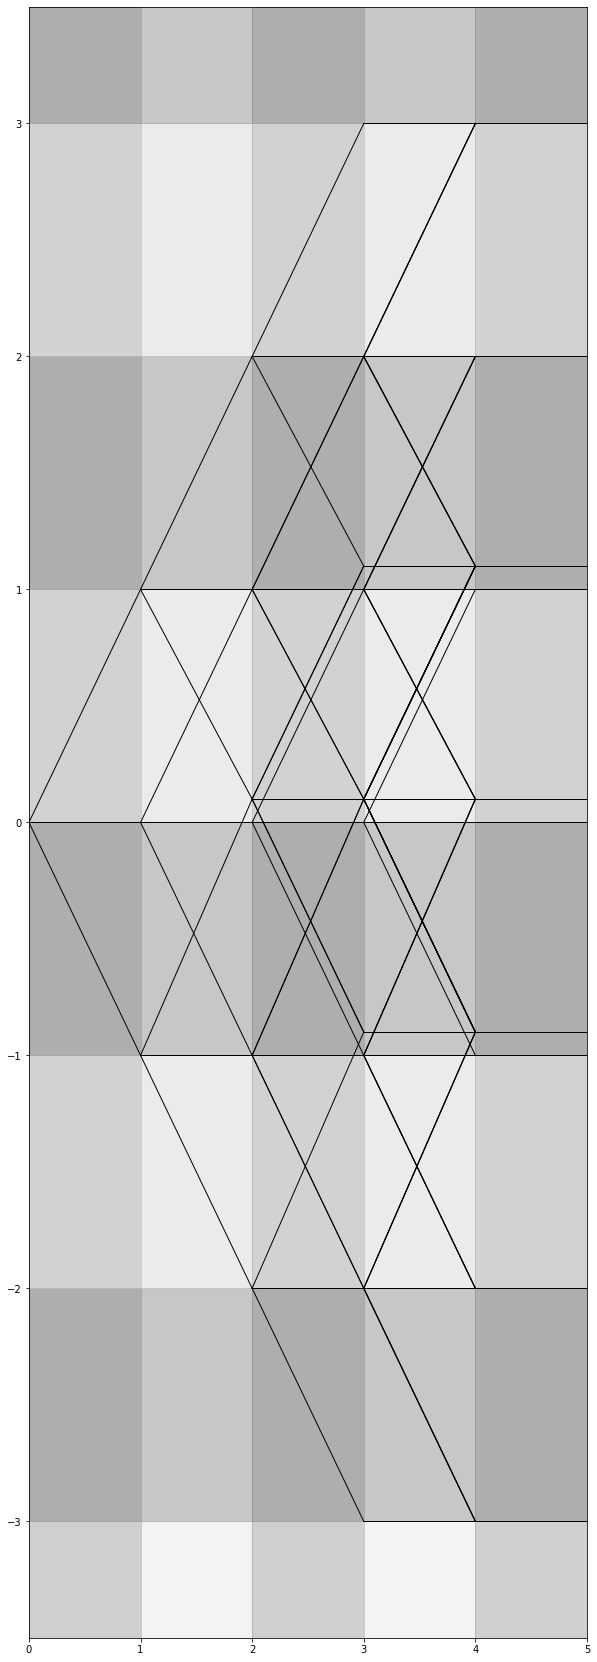

In [263]:
plt.rcParams['figure.figsize'] = [10, 30]
nx = max_iterations + 1
colorx = [16+3*(i%2) for i in range(nx)]
colorx_lim = [i for i in range(nx+1)]
ny = 2*max_sum_goals+1
colory = [16+3*(i%2) for i in range(ny)]
colory_lim = [i - max_sum_goals for i in range(ny+1)]

fig = plt.figure()
ax = fig.add_axes([0.125, 0.125, 0.775, 0.755])

cmap = matplotlib.cm.get_cmap('tab20c')
for i, c in enumerate(colorx):
    ax.axvspan(colorx_lim[i], colorx_lim[i+1], alpha=0.3, color=cmap.colors[c])
for i, c in enumerate(colory):
    ax.axhspan(colory_lim[i], colory_lim[i+1], alpha=0.3, color=cmap.colors[c])

ax.set_xlim(0, max_iterations + 1)
ax.set_ylim(-min(max_sum_goals, max_iterations) - 0.5, 
            min(max_sum_goals, max_iterations) + 0.5)

count_occurences_of_results = [[0 for k in range(2*max_sum_goals+1)] for j in range(max_iterations+2)]
illustration(0, 0, 0, 0)

In [260]:
def illustration(h0, a0, i, adj0):
    if (h0 + a0 == max_sum_goals) or i == max_iterations:
        r = [0]
    else:
        r = [-1, 0, 1]
    for next_goal in r:
        h1 = h0 + max(0, next_goal)
        a1 = a0 - min(0, next_goal)
        diff1 = h1 - a1
        sum1 = h1 + a1
        #occ = count_occurences_of_results[i][diff1]
        adj1 = (sum1 - abs(diff1)) / 20
        x = (i, i + 1)
        y = (h0 - a0 + adj0, h1 - a1 + adj1)
        plt.plot(x, y, "k", linewidth = 1)#(2 + 2 * sum1 / max_sum_goals))
        count_occurences_of_results[i + 1][diff1] += 1
        if i < max_iterations:
            illustration(h1, a1, i + 1, adj1)